In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

In [3]:
# To see all the columns in dataset
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('housing+data.csv',na_values=['?'])
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


## Descriptive Statistics

In [5]:
# no. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [6]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


Inference : The info of the data show that there are missing values in electrical,Garagetype,Fence,MiscFeature

In [7]:
# Five point summery             # .T is use for transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


The summary shows that there is chance of outliers in columns totalbsmtsf,grlivarea,garagearea,saleprice

In [8]:
# Description of categorical column
data.describe(include= 'object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [9]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [10]:
# identify the numeric columns and category columns in the dataset
num_cols= ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols= ['OverallQual','Electrical','FullBath','GarageType','GarageCars','Fence','MiscFeature']

In [11]:
# to check the type of column first we do .value_counts()
# if freuqncy is less nd category is more ,  we consider it as numeric column
# if frequecy is more nd category is less,  we consider it as categorical column

In [12]:
data['OverallQual'].value_counts()

5     380
6     362
7     312
8     168
4     112
9      43
3      19
10     17
2       3
1       2
Name: OverallQual, dtype: int64

In [13]:
data['YearBuilt'].value_counts()

2006    67
2005    61
2004    51
2007    49
2003    45
        ..
1882     1
1875     1
1911     1
1917     1
1872     1
Name: YearBuilt, Length: 110, dtype: int64

<Axes: >

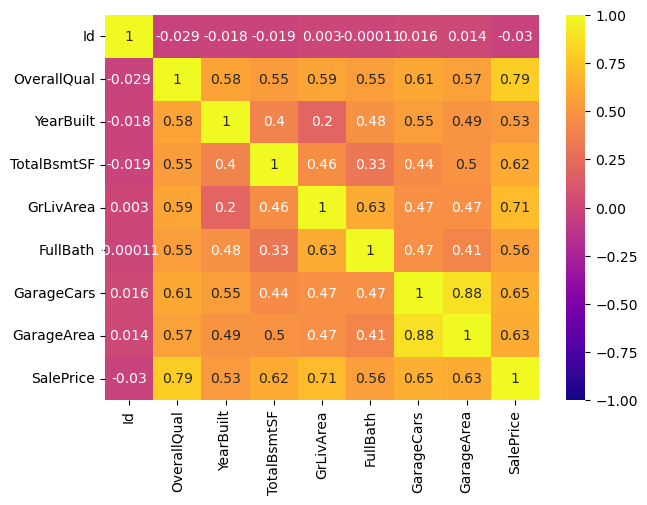

In [14]:
# Correlation plot
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax= 1,vmin= -1,cmap= 'plasma',annot=True)

In [15]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [16]:
# Lets remove id as it makes no sense in the data
del data['Id']

In [17]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical', 'GrLivArea',
       'FullBath', 'GarageType', 'GarageCars', 'GarageArea', 'Fence',
       'MiscFeature', 'SalePrice'],
      dtype='object')

### Univariate Analysis on the data

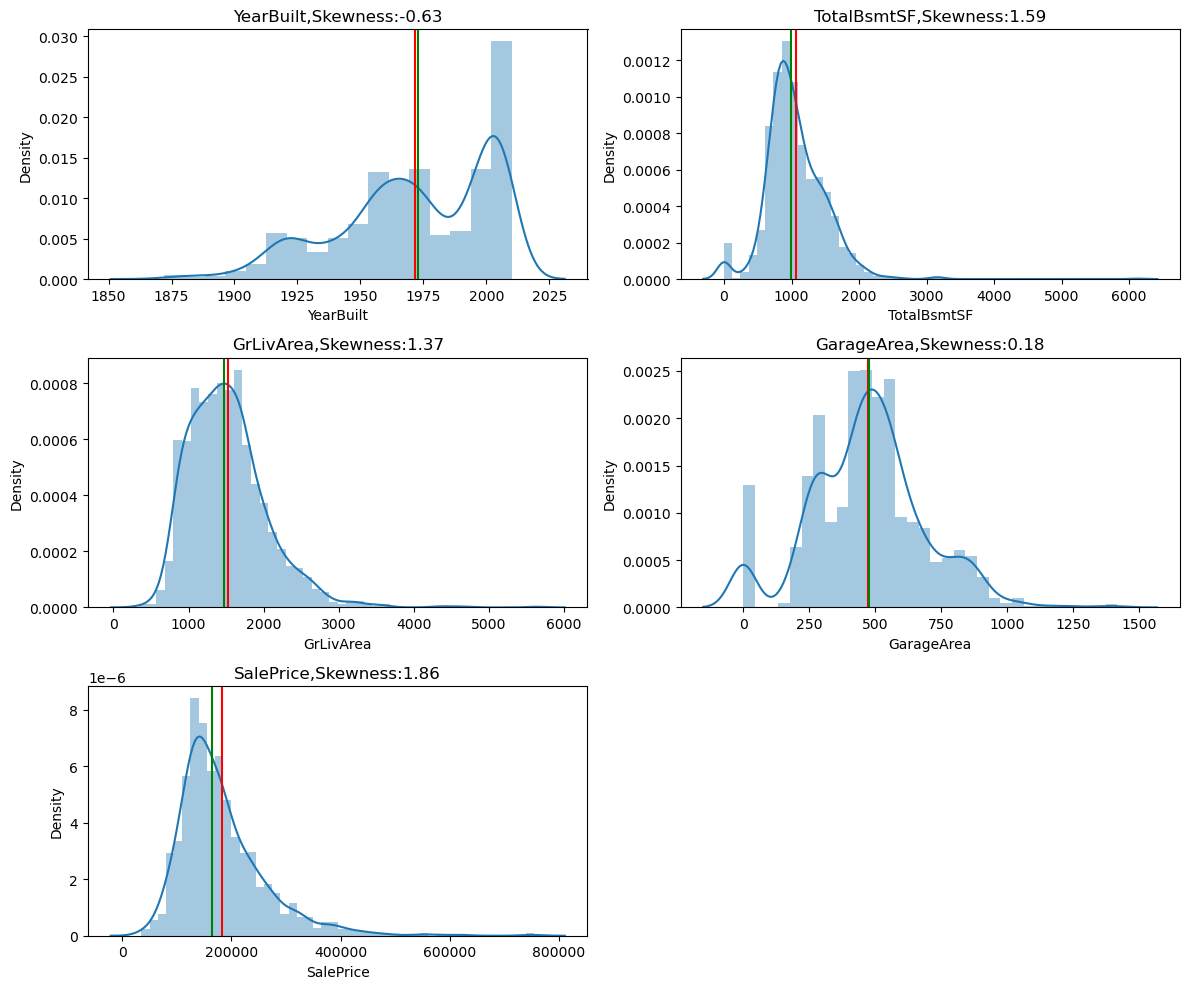

In [18]:
# Number columns
plt.figure(figsize=(12,10))

t= 1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

Inferences:
1. The dsitribution of yearbuilt shown most of property are recent
2. Most of the properties have total basement area between 500 and 1200 sqft and it is right skewed
3. Most of the properties have ground living area between 1000 to 2000 sqft and it is also right skewed
4. Most of properties has garage area between 400 to 600 sqft and it is approx. normal 
5. Most of properties has sale price less than 2lakh dollars  and it is right skewed.


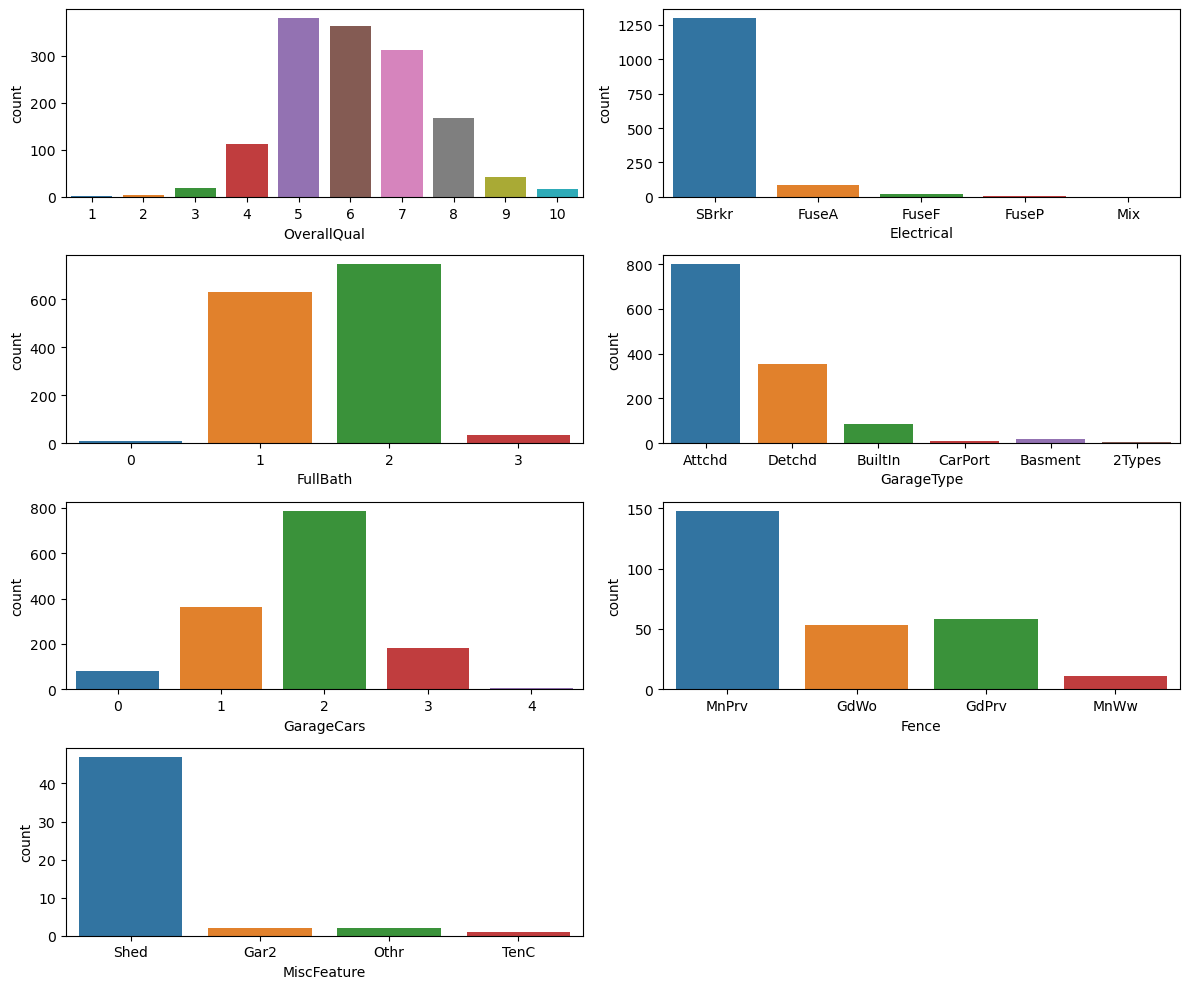

In [19]:
# Category Columns
plt.figure(figsize=(12,10))
t = 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=data,x=i)
    t+=1

plt.tight_layout()
plt.show()
    

Inferences:
1. Most of the properties have quality 5,6,7
2. Most of the properties have SBrkr electrical
3. most of the properties have either 1 or 2 bathroom
4. most of the propteries have either attached or detched garage types
5. most of the garages can park 2 cars
6. most of the properties have MnPrv type Fence
7. Most of the miscfeature is Shed

## Bivariate  Analysis

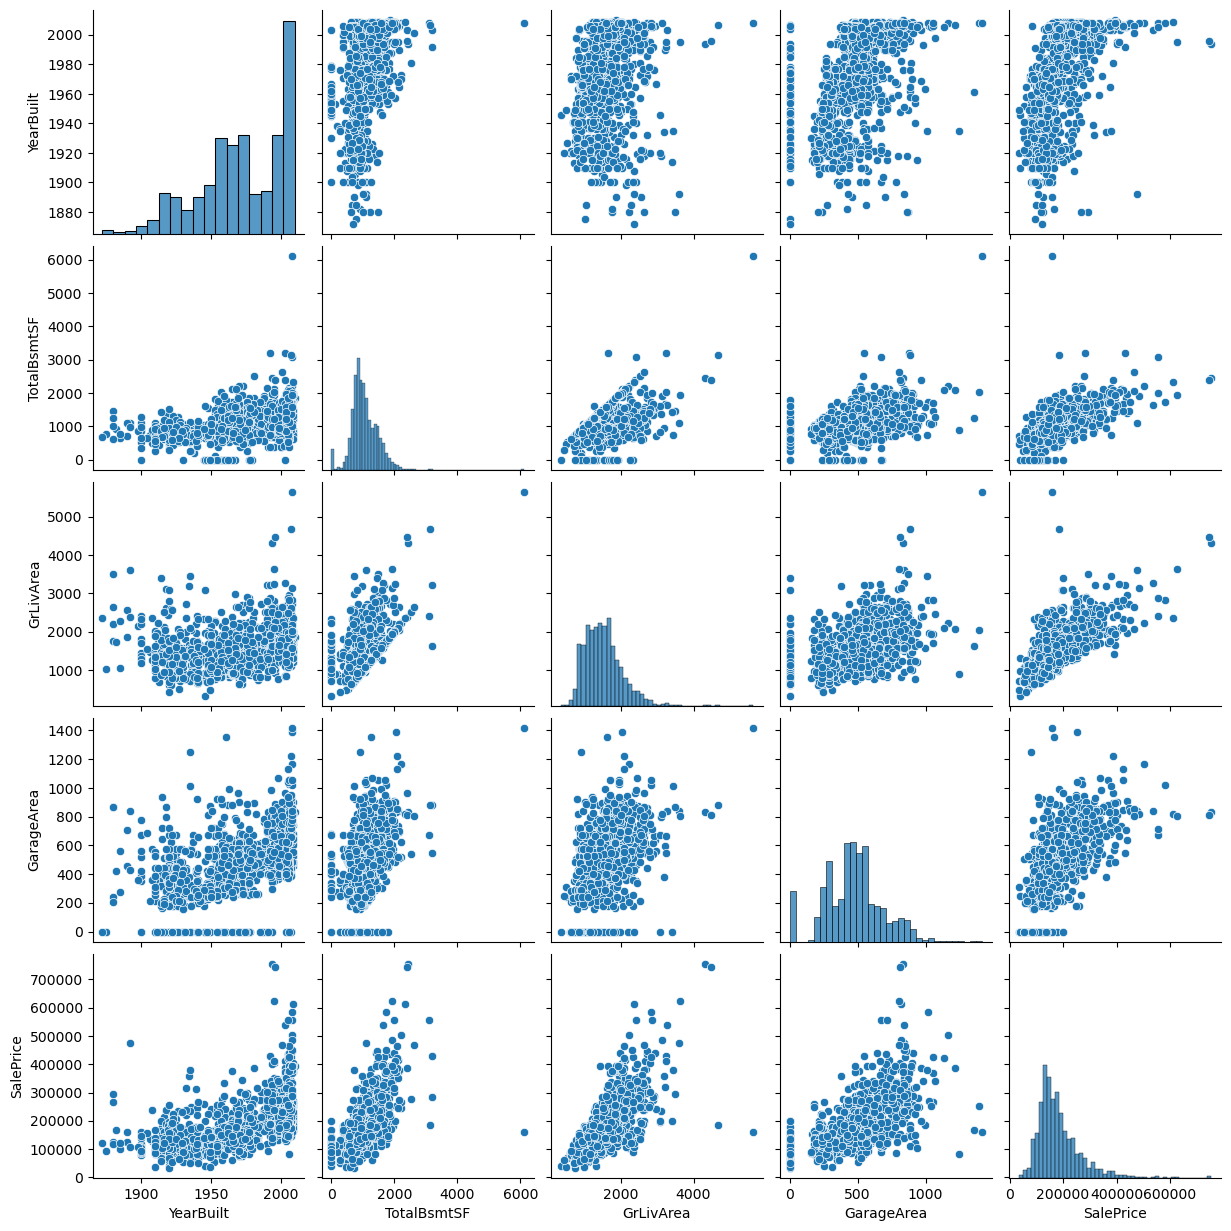

In [20]:
# Number vs Number


sns.pairplot(data[num_cols])

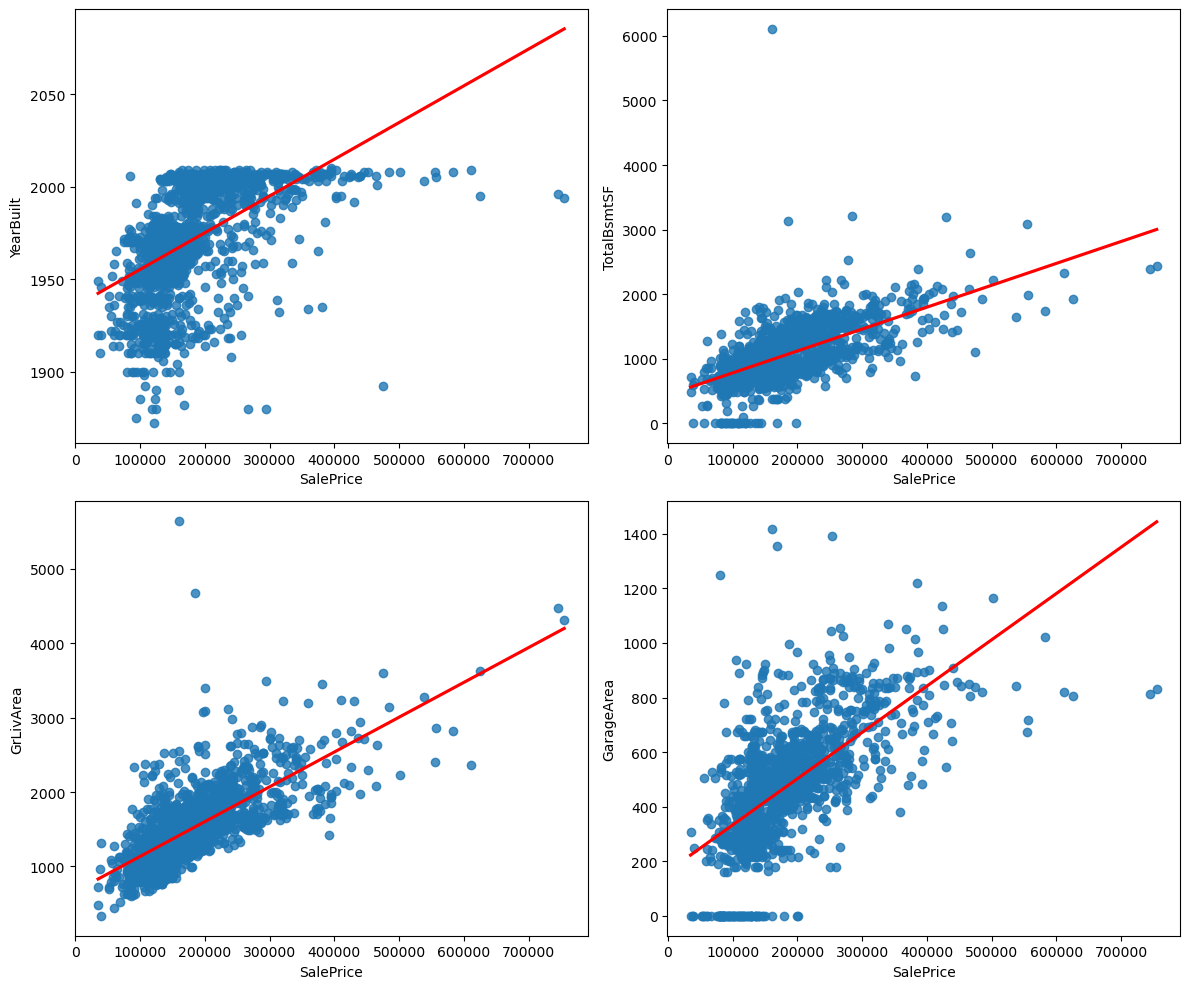

In [21]:
plt.figure(figsize=(12,10))
t = 1
for i in num_cols:
    if i!='SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci= 0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

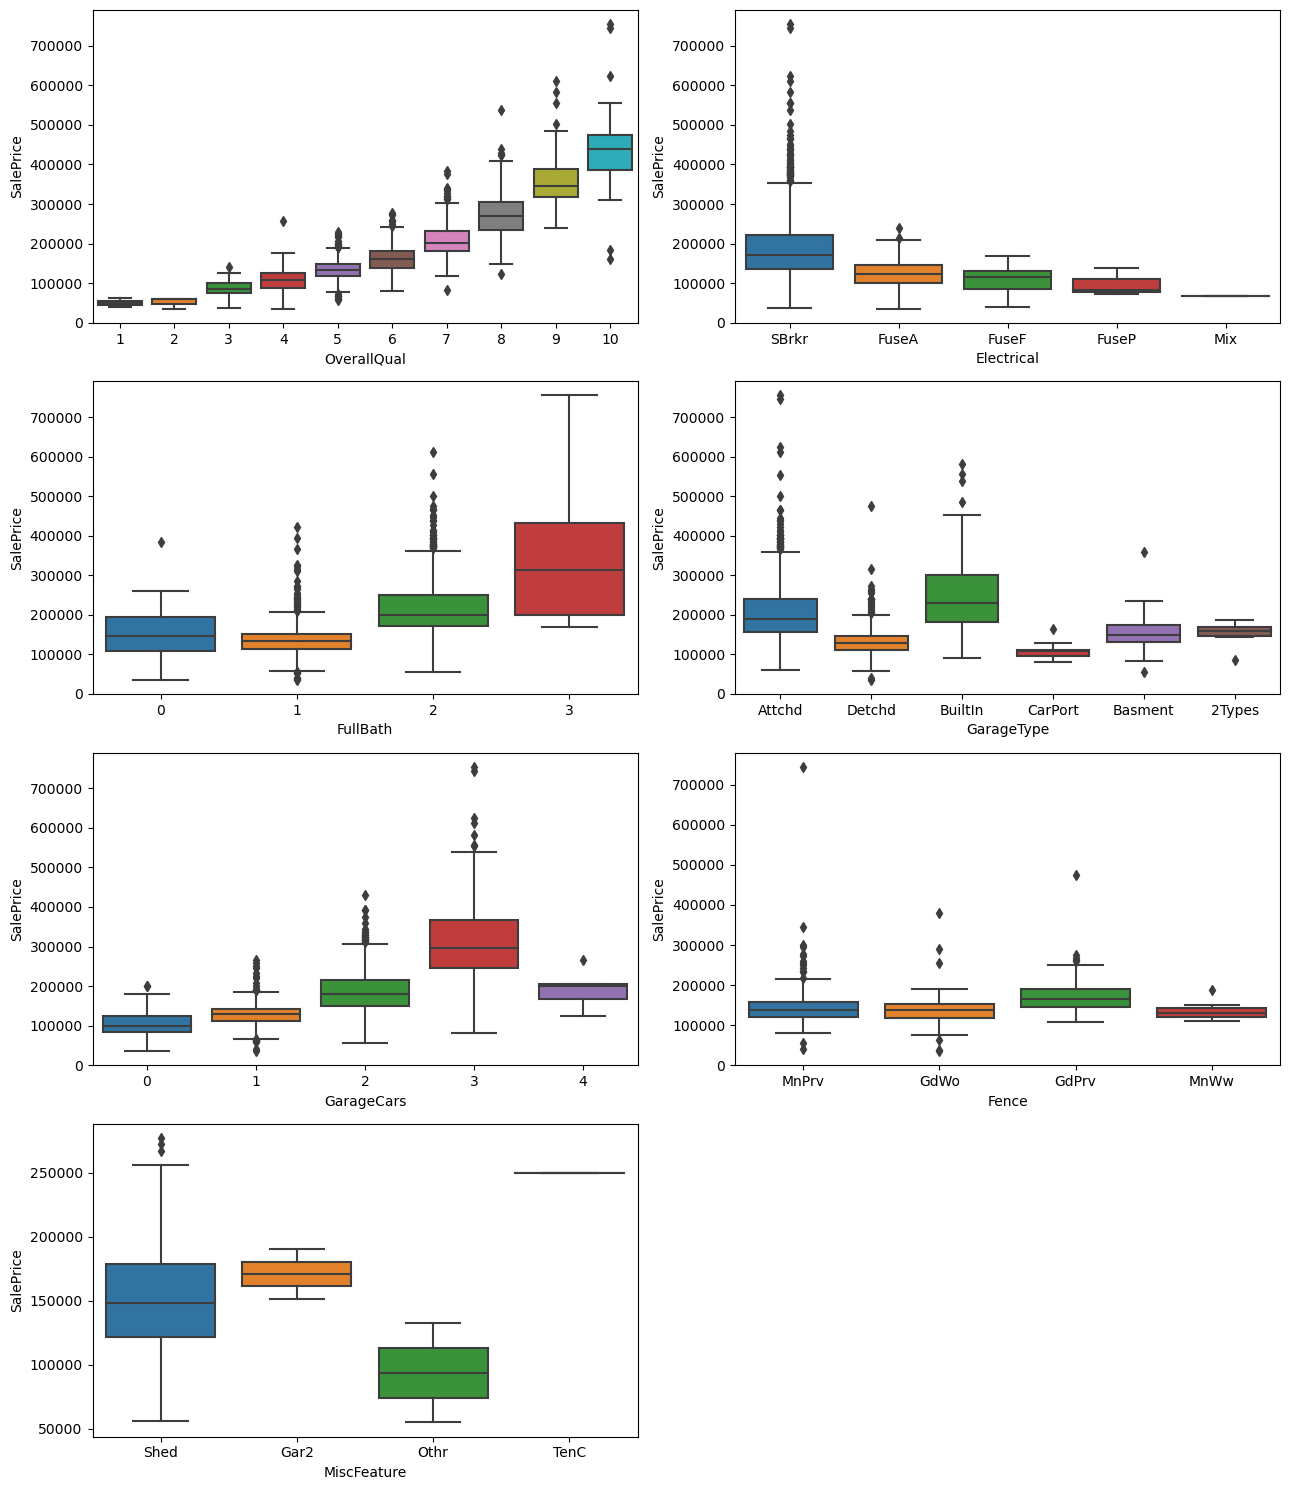

In [22]:
# Number vs Category

plt.figure(figsize=(13,15))
t= 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x= i,y='SalePrice')
    t+=1

plt.tight_layout()
plt.show()

Inferences:
1.
2. Sbrkr category in electrical has higher salesprice other than 
3. Properties which have 3 bathroom have high sales price 
4. bulitin and attached garagetype has high sale price
5. garage cars increases sales price increases 

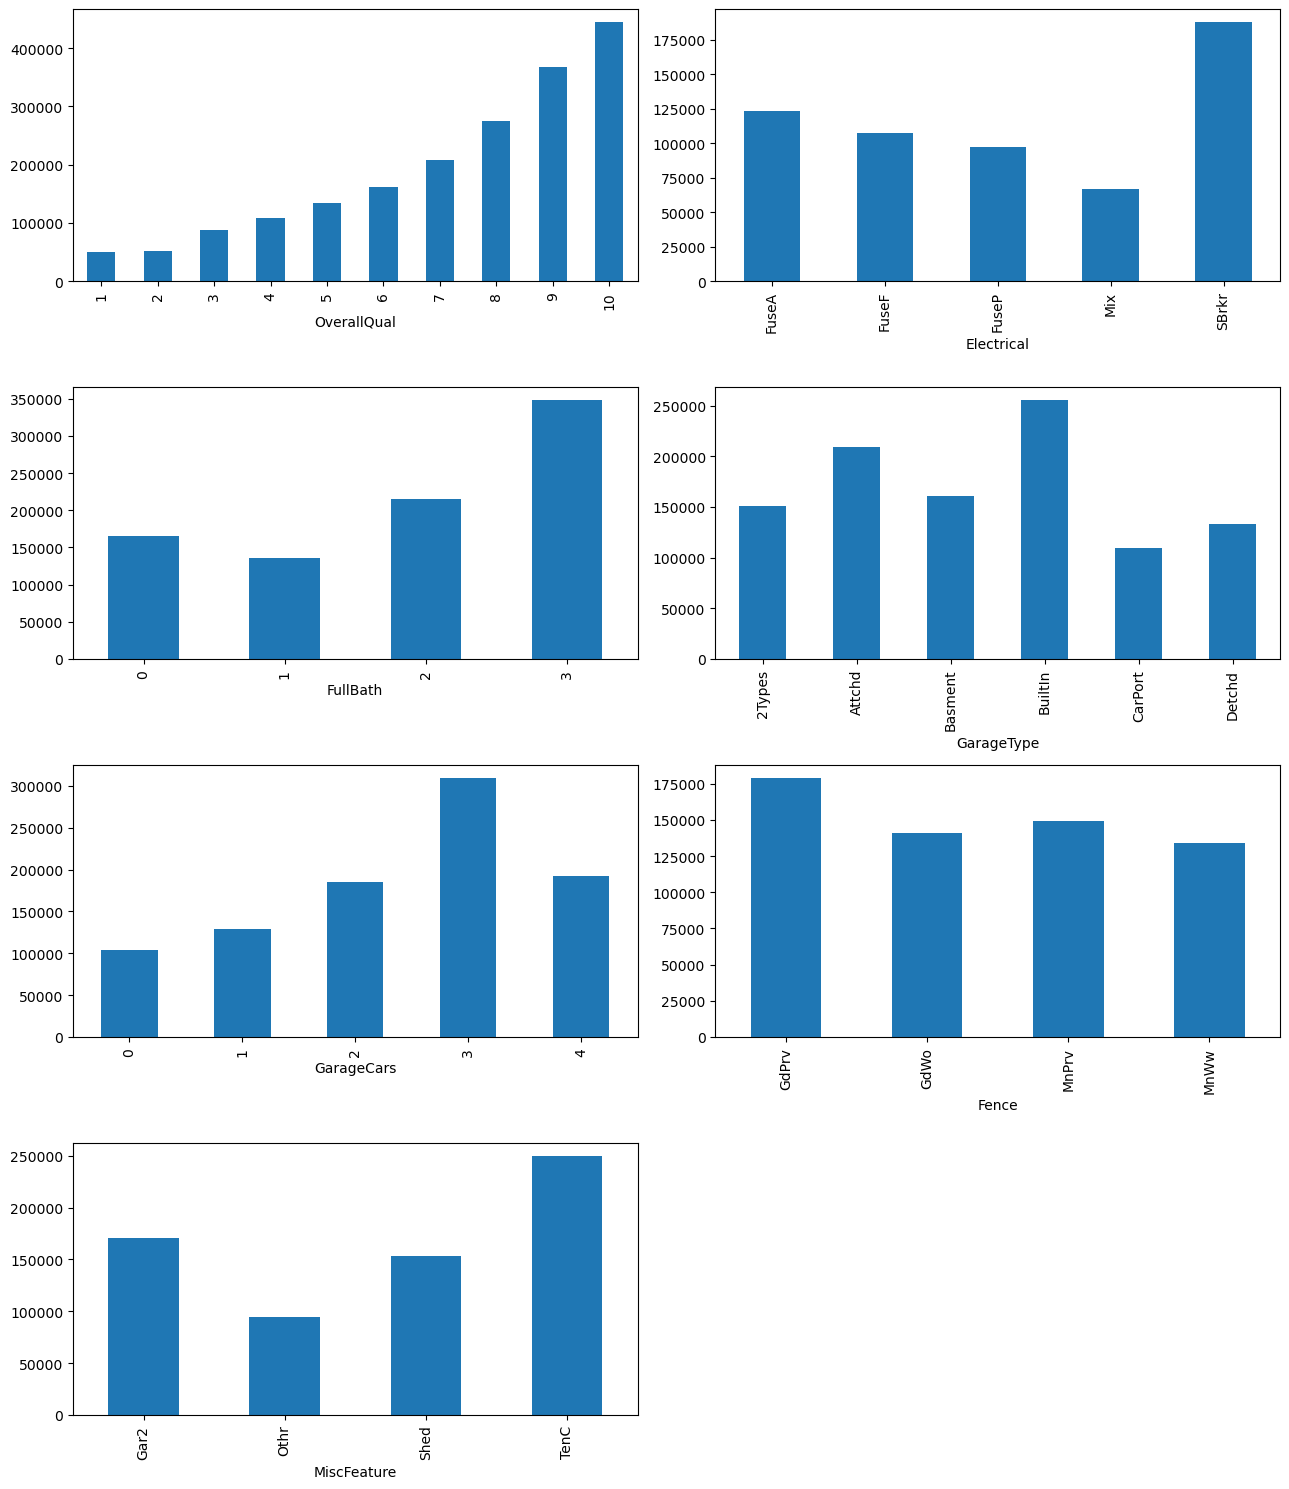

In [23]:
# to check the avg price in each category
plt.figure(figsize=(13,15))
t= 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1

plt.tight_layout()
plt.show()

### Data Analysis

## Statistical Analysis

 ### Key Inferences: 
1. Yearbulit ,GrLivArea,TotalBsmtSF, GarageArea are related to the sale price
2. BuiltQual,Electrical, FullBath,GarageType, GarageCars are also affecting the sale price

In [24]:
# Lets explore yearbuilt and salesprice stattiscally
# both the columns are numerics so we use spearman test


In [25]:
# Assumption: Data must be normal 

# Ho: The data is norMAL
# Ha : The data is not normal

print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

# since both pvalues are less than 0.05 we have to reject Ho. So we can go with spearman's correlated
# test(non parametric)

ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [26]:
# Spearman's correlation test
#Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


In [27]:
for i in num_cols:
    if i!= 'SalePrice':
        print(stats.spearmanr(data['SalePrice'],data[i]))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


In [28]:
# lets prove statistically the affect of garagetype on saleprice
# there are 6 samples and it is categorical and  salprice is numerical 
# assumption are failed 
# so we applied kruskal wallis test 

In [29]:
# Kruskal Wallis's test
#Ho: mu1 = mu2 ==== .. mu6
#Ha: Atleast one mean is different

s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basement']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']

print(stats.kruskal(s1,s2,s3,s4,s5,s6))


KruskalResult(statistic=nan, pvalue=nan)


## Data Preprocessing

### Feature Engineering

In [30]:
# we will create a new column age by assuming the data was collected in 2010.
# we will substract 2010 and yearbuilt.
data['Age'] = 2010-data['YearBuilt']

data.drop(columns=['YearBuilt'],inplace=True)
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<Axes: xlabel='SalePrice', ylabel='Age'>

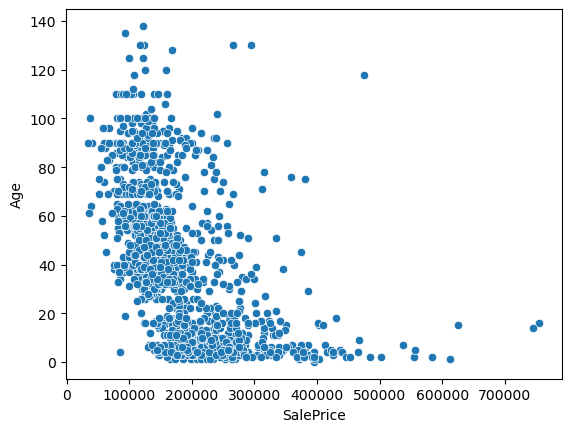

In [31]:
sns.scatterplot(x= data['SalePrice'],y= data['Age'])


In [32]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


### Missing Values

In [33]:
missing_per= ((data.isnull().sum()/data.shape[0])*100).sort_values(ascending = False)

In [34]:
missing_per[missing_per>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [35]:
# Missing Value treatment
#  first go with :  closet fit -- 
# central value imputation
#  last option: deletion (lot of data is missing in column or very few rows in the data has missing column)

In [36]:
# lets treat missing value in electrical column 

data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [37]:
# Central value imputation

data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [38]:
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age


In [39]:
# Garage Type
# Lets treat missing values in Garage Type

In [40]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [41]:
# lets impute the missing values where garage area and garage cars are 0
# with new category 'NoGarage'

data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),'NoGarage',data['GarageType'])

In [42]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
47,5,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000,44
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500,68
1317,5,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000,44
1357,5,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000,60
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70


In [43]:
data[data['GarageType'].isnull()]['GarageCars'].value_counts()

1    62
Name: GarageCars, dtype: int64

In [44]:
data.groupby(by)

NameError: name 'by' is not defined

In [ ]:
# since mode of garagetype where garagecars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace= True)

In [ ]:
data[data['GarageType'].isnull()]

In [ ]:
# there is missing values are laerge so before delete all data  we can go with binning

# lets treat missing values in Fence
data['Fence'].unique()

In [ ]:
# lets bin this data into 0-Fence not present, 1-Fence present

data['Fence']=np.where(data['Fence'].isnull(),0,1)

In [ ]:
data['Fence'].value_counts()

In [ ]:
# Lets validate this statistically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['Fence']==0]['SalePrice'],data[data['Fence']==1]['SalePrice'])

In [ ]:
sns.boxplot(x=data['Fence'],y = data['SalePrice'])

In [ ]:
# lets treat the missing value in MiscFeature

data['MiscFeature'].unique()

In [ ]:
# Lets assume nan here means no MiscFeature
# 1-- MiscFeature yes
# 0 -- MiscFeature No

data['MiscFeature']= np.where(data['MiscFeature'].isnull(),0,1)
data['MiscFeature'].value_counts()

In [ ]:
# Lets validate this statistically
# Ho: The samples are independent
# Ha: The samples are dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],data[data['MiscFeature']==1]['SalePrice'])

In [ ]:
sns.boxplot(x=data['MiscFeature'],y = data['SalePrice'])

In [ ]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [ ]:
data.isnull().sum()

### Outlier Treatment

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
data[data['TotalBsmtSF']>6000]

In [ ]:
data[data['GrLivArea']>5000]

In [ ]:
data[data['SalePrice']>700000]

In [ ]:
data.drop(index= [1260],inplace=True)

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# Cap the outliers
# here we do not drop the outlier but we doing caping

# remove the outliers

In [ ]:
# lets cap the outliers to 99th percentile in GarageArea, TotalBsmtSF, and GrLivArea


for i in ['GarageArea', 'TotalBsmtSF', 'GrLivArea']:
    ul= np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

### Feature Scaling

In [ ]:
#  min- max scaling : ( range lie btw 0 and 1)  : x' = (x- xmin)/xmax - x min


# Standard scaling : range ( - infinity to + infinity)      : x' = x- mu/ sigma

# normal and standard scaling affected by the outliers

# Robust Scaling  :  x' = (x- Q1)/ IQR
# this is not affected by the outliers and we can say robust to outliers




In [ ]:
from sklearn.preprocessing import MinMaxScaler ,StandardScaler,robust_scale

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
scale = MinMaxScaler()

In [ ]:
scale.fit_transform(data[['Age','GrLivArea','TotalBsmtSF','GarageArea']])

In [ ]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    scale = MinMaxScaler()
    data[i] = scale.fit_transform(pd.DataFrame(data[i]))

In [ ]:
data

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# use Standard scale

In [ ]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    scale = StandardScaler()
    data[i] = scale.fit_transform(pd.DataFrame(data[i]))

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

### Feature Transformation

In [ ]:
# to reduce the skewness or make the  data normal  we do feature transformation 
# sqrt transformatiom
# cuberoot transformation
# log transformation
# boxcox transformation
# yeo johnson transformation

In [ ]:
# sqrt tranformation    - not appplicable when  data have -ve values
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(np.sqrt(data[i]).skew(),2)}')
    sns.distplot(x=np.sqrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# cuberoot tranformation
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(np.cbrt(data[i]).skew(),2)}')
    sns.distplot(x=np.cbrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

In [ ]:
# log transofrmation and boxcox  transformation these are sensitive to negative values 

In [ ]:
# Box - Cox transformation

from sklearn.preprocessing import PowerTransformer

In [ ]:
 pt = PowerTransformer(standardize=False)                        # standardize is false beacuse we already do scaling

In [ ]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    data[i] = pt.fit_transform(pd.DataFrame(data[i]))

In [ ]:
plt.figure(figsize=(12,10))

t= 1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness:{round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

### Encoding

In [ ]:
data.head(2)

In [ ]:
# Target encoding

In [ ]:
data['Electrical'].value_counts()

In [ ]:
data['Electrical']

In [ ]:
data['GarageType'].value_counts()

In [ ]:
def garagetype(s):
    if s in ['Basment','CarPort','2Types']:
        return 'Others'
    else:
        return s

In [ ]:
data['GarageType']= data['GarageType'].apply(garagetype)


In [ ]:
data['GarageType'].value_counts()

In [ ]:
data = pd.get_dummies(data,drop_first=True)

In [ ]:
data.head(2)